In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

data = pd.read_csv(r'C:\Users\DELL\Documents\trlist.csv')    #importing the dataset
data.head(5)


,Substationcode,Circlecode,Transformervolt rated,Maxvolt actual,Minvolt actual,Max volt permissible,Min volt permissible,Deviation max volt,Deviation min volt,Status max volt,Status min volt
0,1010001,101,110,110.0,95.0,121.0,99.0,11.0,4.0,1,0
1,1010002,101,110,116.0,103.0,121.0,99.0,5.0,-4.0,1,1
2,1010003,101,110,109.0,91.2,121.0,99.0,12.0,7.8,1,0
3,1010004,101,110,109.0,91.2,121.0,99.0,12.0,7.8,1,0
4,1020001,102,22,24.5,19.5,24.2,19.8,-0.3,0.3,0,0


In [2]:
data.tail(5)


,Substationcode,Circlecode,Transformervolt rated,Maxvolt actual,Minvolt actual,Max volt permissible,Min volt permissible,Deviation max volt,Deviation min volt,Status max volt,Status min volt
494,8030020,803,22,22.6,20.0,24.2,19.8,1.6,-0.2,1,1
495,8030021,803,22,23.5,20.0,24.2,19.8,0.7,-0.2,1,1
496,8030022,803,22,24.4,18.8,24.2,19.8,-0.2,1.0,0,0
497,8030023,803,22,23.0,21.0,24.2,19.8,1.2,-1.2,1,1
498,8030024,803,22,26.0,19.0,24.2,19.8,-1.8,0.8,0,0


In [3]:
data.shape


(499, 11)

In [4]:
data.describe()


,Substationcode,Circlecode,Transformervolt rated,Maxvolt actual,Minvolt actual,Max volt permissible,Min volt permissible,Deviation max volt,Deviation min volt,Status max volt,Status min volt
count,4.990000e+02,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,4.536705e+06,452.661323,24.444890,24.808697,22.167154,26.889379,22.000401,5.365571,3.153567,0.895792,0.685371
std,2.398327e+06,240.760366,28.328652,28.518484,25.649077,31.161517,25.495787,20.087320,16.959059,0.305837,0.464834
min,1.010001e+06,101.000000,11.000000,10.000000,0.970000,12.100000,9.900000,-91.800000,-87.700000,0.000000,0.000000
25%,2.030022e+06,203.000000,11.000000,11.400000,10.200000,12.100000,9.900000,0.400000,-1.000000,1.000000,0.000000
50%,5.020001e+06,502.000000,11.000000,12.000000,10.800000,12.100000,9.900000,0.900000,-0.400000,1.000000,1.000000
75%,7.010016e+06,701.000000,22.000000,23.800000,21.500000,24.200000,19.800000,1.700000,0.500000,1.000000,1.000000
max,8.030024e+06,803.000000,230.000000,230.000000,210.000000,253.000000,207.000000,121.000000,99.000000,1.000000,1.000000


In [5]:
data.columns


Index(['Substationcode', 'Circlecode', 'Transformervolt rated',
       'Maxvolt actual', 'Minvolt actual', 'Max volt permissible',
       'Min volt permissible', 'Deviation max volt', 'Deviation min volt',
       'Status max volt', 'Status min volt'],
      dtype='object')

In [6]:
data.isnull().sum()


Substationcode           0
Circlecode               0
Transformervolt rated    0
Maxvolt actual           0
Minvolt actual           0
Max volt permissible     0
Min volt permissible     0
Deviation max volt       0
Deviation min volt       0
Status max volt          0
Status min volt          0
dtype: int64

In [7]:
X = data.iloc[:,0:8]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 
X_train.shape
X_test.shape


(150, 8)

Text(0.5, 0, 'Max voltage')

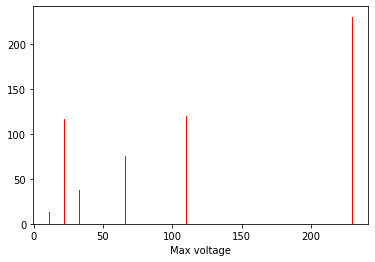

In [8]:
plt.title("")
plt.bar(data['Transformervolt rated'],data['Maxvolt actual'],color='red',width=0.7,align='center')
plt.xlabel("Transformer voltage")
plt.xlabel("Max voltage")
        

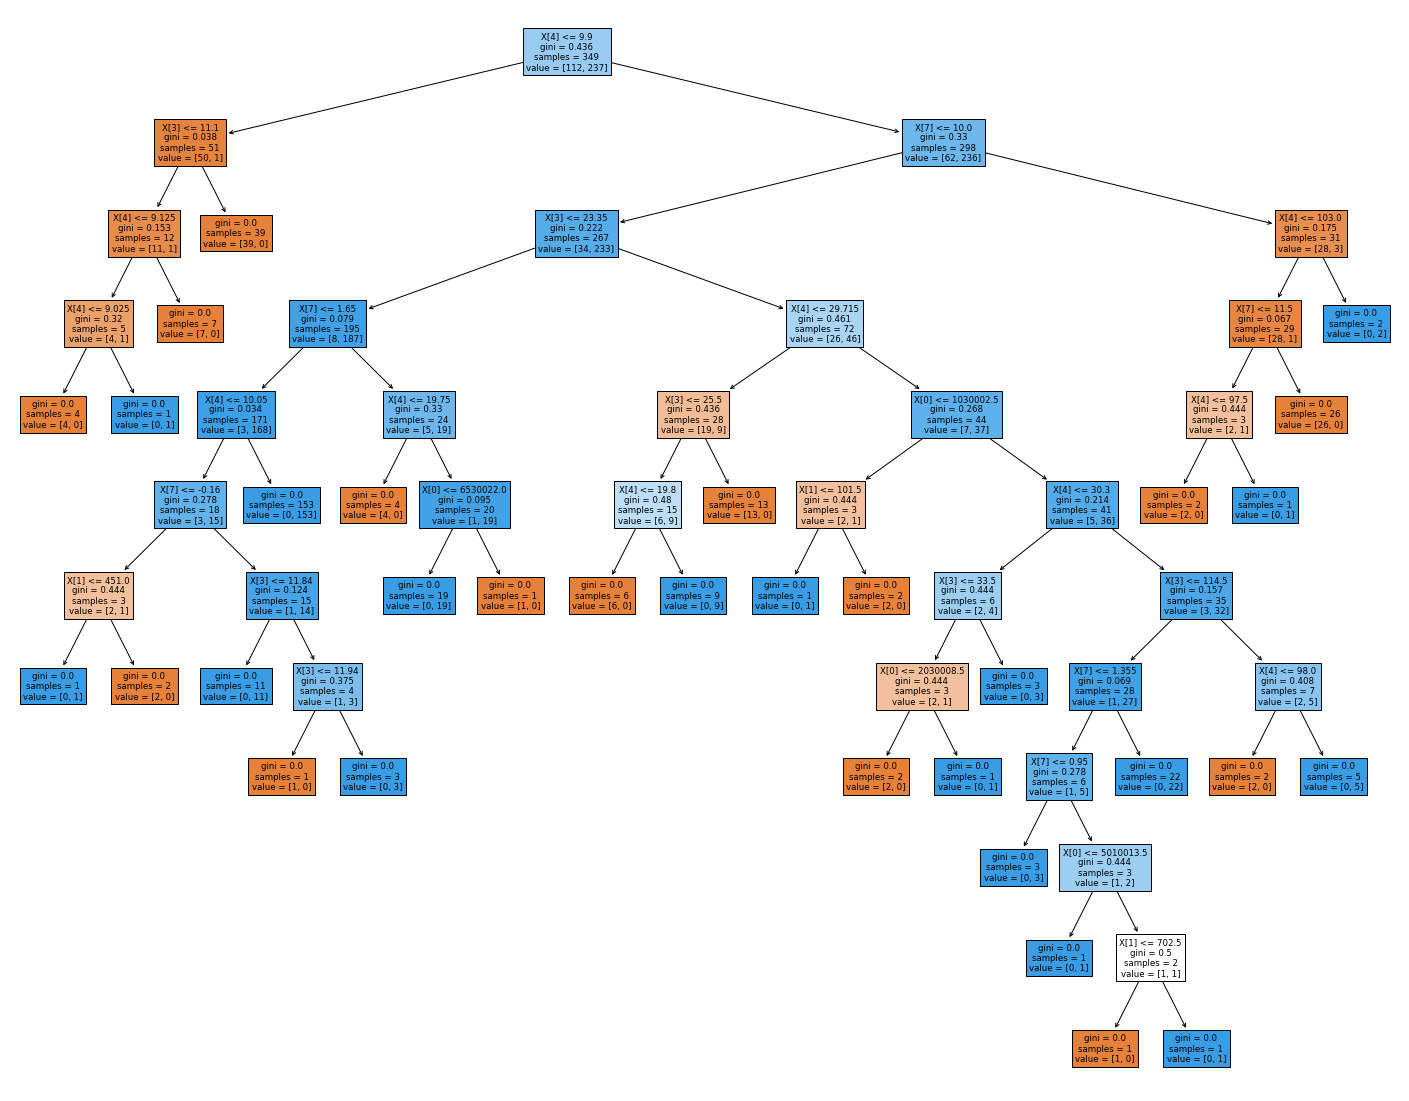

In [9]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
plt.figure(figsize=(25,20))
tree.plot_tree(clf,filled=True)
#feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']

feature_cols = ['Substationcode', 'Circlecode', 'Transformervolt rated','Maxvolt actual', 'Max volt permissible','Deviation max volt', 'Deviation min volt', 'Status max volt', 'Status min volt']



In [10]:

#by Attribute selection measure 
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
y_pred= clf.predict(X_test)  
print(y_pred)
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm


Accuracy: 0.9133333333333333
[1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1
 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1
 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1
 1 1]


array([[ 33,  12],
       [  1, 104]], dtype=int64)